#### <strong>第三次作品：分類器的原理與評比實驗</strong>
學號：711233115

姓名：許政揚
<hr>

 <font color=skyblue>作品目標</font>：
- 使用標準化資料以及主成分資料進行模型訓練，並分為訓練集與測試集。

- 使用三種分類器進行訓練與測試。

- 比較不同資料對於不同分類器之訓練結果的準確率。

<hr>

#### <strong><font color=cornflowerblue>第一部分 : </font></strong> 
#### <strong><font color=lightsteelblue>準備資料(讀入資料、分離資料、標準化資料)</font></strong> 

以下程式碼為將葡萄酒的資料讀入，其中資料來自 3 個產區、共178 瓶葡萄酒且含 13 種葡萄酒成分。並將資料中的X、y分別以 7:3 的比例切割成訓練與測試集，最後得到共4組資料集。同時設置 random_state 確保後續使用的為同一份資料，最後對 X 的訓練與測試集分別標準化以便在後續的分類器中使用。

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

# Read data
df = pd.read_excel('/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/Excel_file/wine.xlsx')
X = np.array(df.iloc[:, :-1]) # 排除最後一欄標籤  #將pandas資料轉成array
y = np.array(df.iloc[:, -1]) #標籤欄
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split( 
    X, y, test_size=0.30 , random_state=18) #把x y分成訓練和測試資料(兩組) 70%訓練 30%測試，總共4組資料
# Standardize data
#要不要標準化資料，標準化後資料平均值為0，標準差為1
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train) 
X_test_ = scaler.fit_transform(X_test)

#### <strong><font color=cornflowerblue>第二部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用標準化後之原始資料</font></strong> 


以下程式碼目的是對訓練集資料使用 Logistic Regression 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以折線圖方便觀察。

三種演算法中表現最好的是使用 'liblinear' 的結果，準確率達到 96.3% 。

Solver: lbfgs
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54



Solver: liblinear
Accuracy: 96.30%

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95        18
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Solver: newton-cg
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.

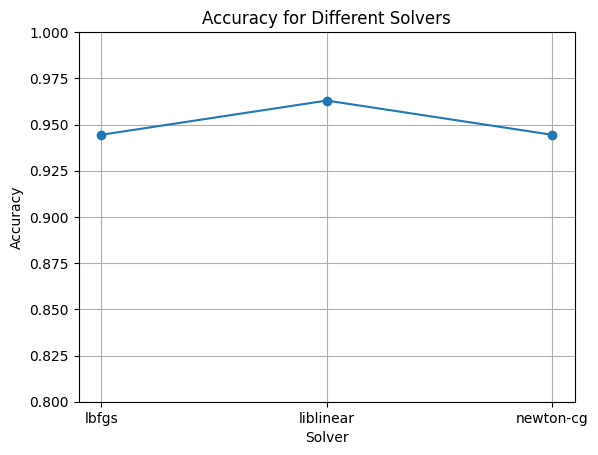

In [89]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR = LogisticRegression(solver=solver, **opts) 
    clf_LR.fit(X_train_, y_train)
    y_pred = clf_LR.predict(X_test_)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>LogisticRegressionCV；使用標準化後原始資料</font></strong> 


以下程式碼目的是對訓練集資料使用 Logistic RegressionCV 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以折線圖方便觀察。

三種演算法中表現最好的同樣是使用 'liblinear' 的結果，準確率同樣達到 96.3% 。

因為使用 Logistic RegressionCV 的好處是其會讓模型自動選擇C值，來確保獲得更佳的模型效能。但在此資料中 Logistic RegressionCV 與 Logistic Regression 的最佳確率表現皆為 96.3%。

Solver: lbfgs
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54



Solver: liblinear
Accuracy: 96.30%

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95        18
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54





/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54





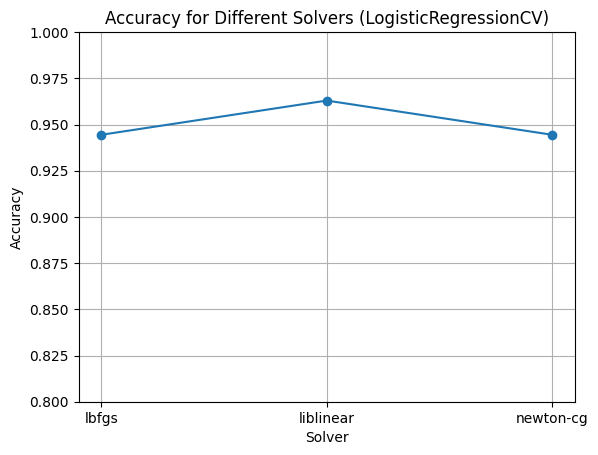

In [91]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)
Cs = np.logspace(-5, 5, 20)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR_CV = LogisticRegressionCV(Cs=Cs, solver=solver, **opts)
    clf_LR_CV.fit(X_train_, y_train)
    y_pred = clf_LR_CV.predict(X_test_)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (LogisticRegressionCV)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>GridSearchCV ( 補充 )</font></strong> 

以下程式碼為補充方法，不放入準確率比較中。目的是使用網格式搜索交叉驗證 GridSearchCV 的方式來尋找最佳的參數調整。

其中設定了五個演算法
'lbfgs' 、 'liblinear' 、 'newton-cg' 、 'sag' 、 'saga'
及三個調整c值，因此執行此程式碼將會進行 15 次訓練來尋找最佳的結果。

而最後結果輸出為以 C值＝0.1 時且演算法使用 'lbfgs' 的結果為15個模型中最佳，準確度達 94.21% 。

In [13]:
from sklearn.model_selection import  GridSearchCV, \
StratifiedShuffleSplit

from datetime import datetime  

# Get the current date and time

now = datetime.now()

# Format the date and time as a string

now_str = now.strftime("%Y_%m_%d_%H_%M_%S") # 取得時間(年月日時分秒)

results_file = '/Users/andrewhsu/Library/Mobile Documents/com~apple~CloudDocs/VsCode_python/SHALLOW_ML/results_csv' + now_str + '.csv' #存成csv檔



opts = dict(tol = 1e-6, max_iter = int(1e6)) # parameters for LogisticRegression

parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg',\

            'sag','saga'], 'C':[0.1, 1, 10]} # parameters for GridSearchCV  
# 5個演算法都會跑，3個C值（調整係數）
#總共會做5*3=15次訓練

# parameters = {'solver':['lbfgs', 'liblinear', 'newton-cg',\

#                         'sag','saga']}

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, \

                            random_state=0) # 5-fold CV

grid = GridSearchCV(estimator=LogisticRegression(**opts), \

                param_grid=parameters, cv=cv, 

                scoring=['accuracy','f1_macro'], refit="accuracy")

grid.fit(X_train, y_train)

# grid.fit(X, y)

cv_logistic = pd.DataFrame(data = grid.cv_results_)

cv_logistic.to_csv(results_file)

print(grid.best_params_)

print(grid.best_score_)

print(grid.best_estimator_)

{'C': 0.1, 'solver': 'lbfgs'}
0.9421052631578947
LogisticRegression(C=0.1, max_iter=1000000, tol=1e-06)


#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Support Vector Machine 訓練模型並測試準確率，其中使用三種不同的 kernal (核函數)與直接使用線性 SVM 。

並依照準確率結果畫出折線圖，方便觀察。

透過折線圖可以清楚的觀察到，使用核函數 'linear'與直接使用 linearSVM 的結果相近且表現最好，準確率分別為 94% , 91%。

Kernel: linear
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54

Accuracy: 94.44%

Kernel: rbf
              precision    recall  f1-score   support

           1       0.94      0.76      0.84        21
           2       0.52      0.67      0.59        18
           3       0.29      0.27      0.28        15

    accuracy                           0.59        54
   macro avg       0.58      0.57      0.57        54
weighted avg       0.62      0.59      0.60        54

Accuracy: 59.26%

Kernel: poly
              precision    recall  f1-score   support

           1       0.94      0.76      0.84        21
           2       0.52      0.83      0.64        18

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Kernel: linearSVM
              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.84      0.89      0.86        18
           3       0.93      0.93      0.93        15

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.91      0.91      0.91        54

Accuracy: 90.74%



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


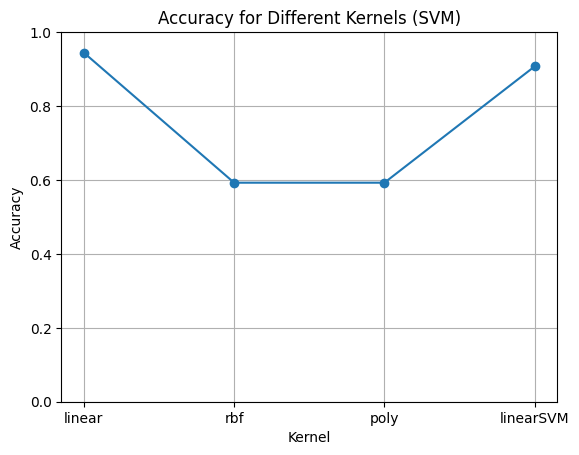

In [96]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly', 'linearSVM']
C = 1 # SVM regularization parameter
opts = dict(C=C, tol=1e-6, max_iter=int(1e6))
accuracies = []  # 用來收集準確率

for kernel in kernels:
    if kernel == 'linearSVM':
        clf_svm = LinearSVC(**opts)
    else:
        clf_svm = SVC(kernel=kernel, **opts)
    
    clf_svm.fit(X_train, y_train)
    y_pred = clf_svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

# 繪製折線圖
plt.plot(kernels, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Kernels (SVM)')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用標準化後原始資料</font></strong> 

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並畫出準確率之折線圖方便觀察。

三種 solver 的測試結果準確率如下：
- 'sgd'  ->   acuracy = 0.6111

- 'lbfgs'  ->   acuracy = 0.5926

- 'adam'       ->   acuracy = 0.9444

其中表現最好的為使用演算法 'adma' 的結果，準確率高達 94.44%，與另外兩個演算法之結果差距非常明顯。

Solver: sgd
              precision    recall  f1-score   support

           1       0.85      0.81      0.83        21
           2       0.47      0.89      0.62        18
           3       0.00      0.00      0.00        15

    accuracy                           0.61        54
   macro avg       0.44      0.57      0.48        54
weighted avg       0.49      0.61      0.53        54

Accuracy: 61.11%

Solver: lbfgs
              precision    recall  f1-score   support

           1       1.00      0.67      0.80        21
           2       0.45      1.00      0.62        18
           3       0.00      0.00      0.00        15

    accuracy                           0.59        54
   macro avg       0.48      0.56      0.47        54
weighted avg       0.54      0.59      0.52        54

Accuracy: 59.26%



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Solver: adam
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.89      0.94      0.92        18
           3       0.94      1.00      0.97        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

Accuracy: 94.44%



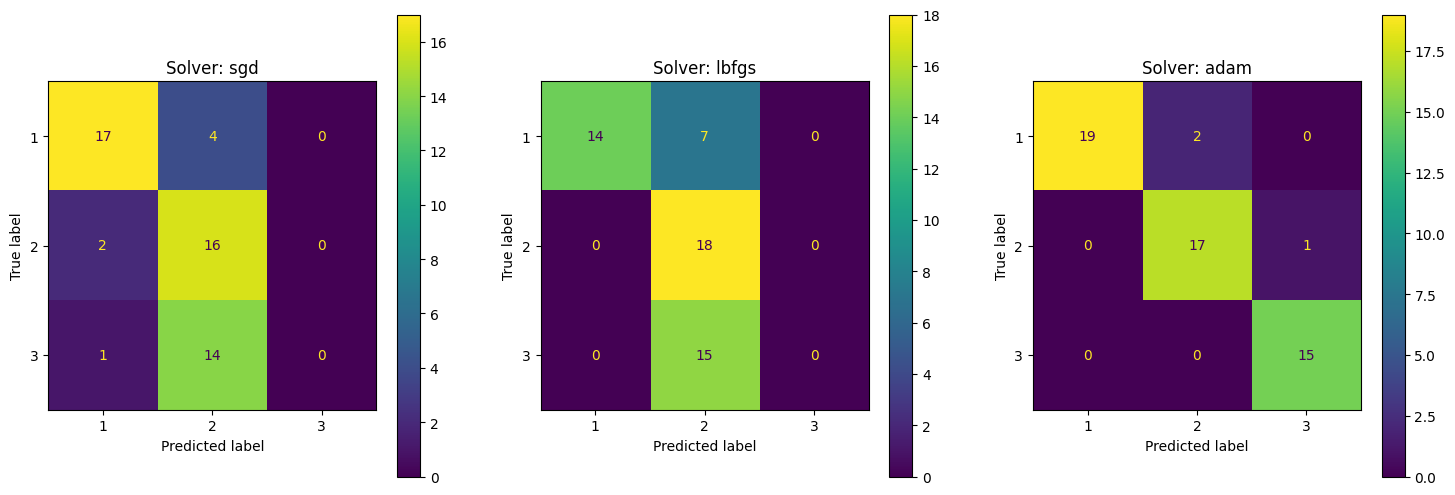

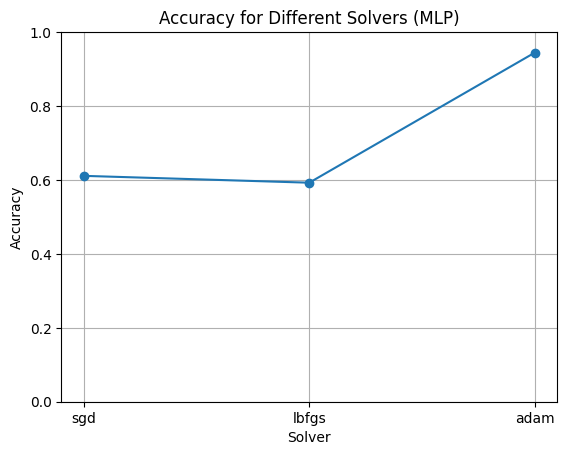

In [118]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

solvers = ['sgd', 'lbfgs', 'adam']
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes=hidden_layers, verbose=False, activation=activation, tol=1e-6, max_iter=int(1e6))

accuracies = []  # 用來收集準確率
confusion_matrices = []  # 用來收集混淆矩陣

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 創建 1x3 的子圖

for i, solver in enumerate(solvers):
    clf_MLP = MLPClassifier(solver=solver, **opts)
    clf_MLP.fit(X_train, y_train)
    y_pred = clf_MLP.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率

    print(f"Solver: {solver}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

    # 繪製混淆矩陣
    disp = ConfusionMatrixDisplay.from_estimator(clf_MLP, X_test, y_test, ax=axes[i])
    disp.ax_.set_title(f'Solver: {solver}')
    confusion_matrices.append(disp.confusion_matrix)  # 收集混淆矩陣

# 繪製準確率折線圖
plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

#### <strong><font color=cornflowerblue>第三部分 : </font></strong> 
#### <strong><font color=lightsteelblue>Logistic Regression；使用主成分PCA資料</font></strong> 

以下程式碼為將原始資料進行主成分分析，並試製 random_state 確保使用資料相同。

其中使用了前10個主成分，可以包含到原始資料中96.37%的資訊。

In [107]:
from sklearn.decomposition import PCA

random_state = 19
pca = PCA(n_components = 10).fit(X_train_) #設定取幾個conponents
Z_train = pca.transform(X_train_) 
Z_test = pca.transform(X_test_)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# Print explained variance ratio for each component
for i, explained_variance in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: Explained Variance Ratio = {explained_variance:.4f}")

# Print cumulative explained variance ratio
for i, cumulative_variance in enumerate(cumulative_explained_variance_ratio):
    print(f"Cumulative Variance up to Principal Component {i+1} = {cumulative_variance:.4f}")

Principal Component 1: Explained Variance Ratio = 0.3617
Principal Component 2: Explained Variance Ratio = 0.1900
Principal Component 3: Explained Variance Ratio = 0.1137
Principal Component 4: Explained Variance Ratio = 0.0699
Principal Component 5: Explained Variance Ratio = 0.0676
Principal Component 6: Explained Variance Ratio = 0.0479
Principal Component 7: Explained Variance Ratio = 0.0409
Principal Component 8: Explained Variance Ratio = 0.0290
Principal Component 9: Explained Variance Ratio = 0.0230
Principal Component 10: Explained Variance Ratio = 0.0201
Cumulative Variance up to Principal Component 1 = 0.3617
Cumulative Variance up to Principal Component 2 = 0.5516
Cumulative Variance up to Principal Component 3 = 0.6653
Cumulative Variance up to Principal Component 4 = 0.7352
Cumulative Variance up to Principal Component 5 = 0.8028
Cumulative Variance up to Principal Component 6 = 0.8507
Cumulative Variance up to Principal Component 7 = 0.8916
Cumulative Variance up to Prin

接著再利用主成分資料中的訓練集資料使用 Logistic Regression 訓練模型並測試準確率。
使用三種不同的 solver (演算法)，
並以準確率畫出折線圖方便後續觀察。

其中使用演算法 'linear' 的結果表現最好，準確率達到 96.3% 。

Solver: lbfgs
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54



Solver: liblinear
Accuracy: 96.30%

              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95        18
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



Solver: newton-cg
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.

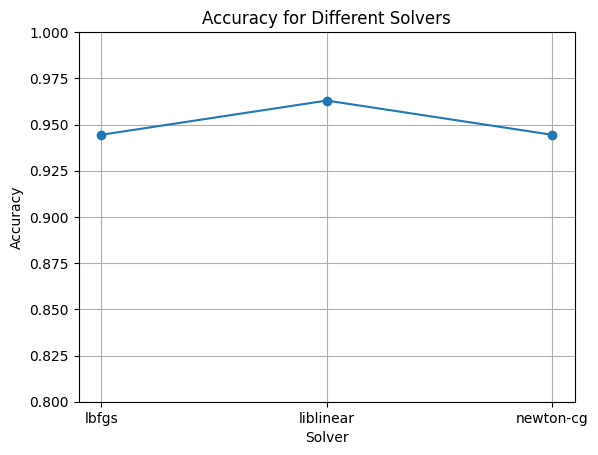

In [108]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR = LogisticRegression(solver=solver, **opts) 
    clf_LR.fit(Z_train, y_train)
    y_pred = clf_LR.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>Logistic RegressionCV；使用主成分PCA資料</font></strong>

以下程式碼目的是利用主成分資料中的訓練集資料使用 Logistic RegressionCV 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以準確率畫出折線圖方便觀察。

結果顯示使用三種不同演算法在 Logistic RegressionCV 的訓練結果準確率皆相同，皆為約94.44%。

Solver: lbfgs
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54



Solver: liblinear
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54





/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:425: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/optimi

Solver: newton-cg
Accuracy: 94.44%

              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.86      1.00      0.92        18
           3       1.00      0.93      0.97        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.95        54





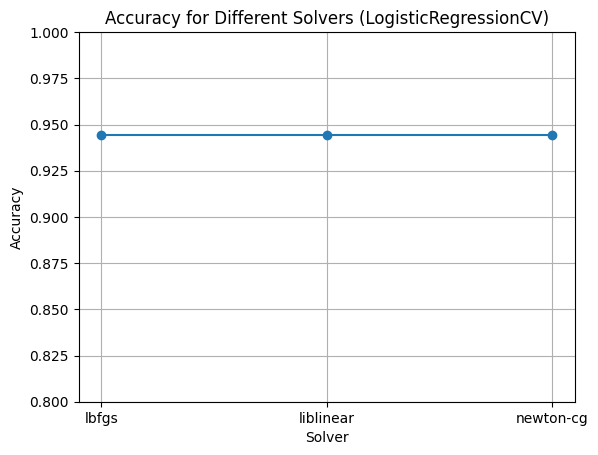

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

solvers = ['lbfgs', 'liblinear', 'newton-cg']
opts = dict(tol=1e-6, max_iter=int(1e6), verbose=0)
Cs = np.logspace(-5, 5, 20)

accuracies = []  # 用來收集準確率

for solver in solvers:
    clf_LR_CV = LogisticRegressionCV(Cs=Cs, solver=solver, **opts)
    clf_LR_CV.fit(Z_train, y_train)
    y_pred = clf_LR_CV.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Solver: {solver}")
    print(f"Accuracy: {accuracy:.2%}\n")
    print(classification_report(y_test, y_pred))
    print("\n")

# 繪製折線圖
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (LogisticRegressionCV)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>支援向量機 (Support Vector Machine)；使用主成分PCA資料</font></strong>

以下程式碼目的是對主成分資料中的訓練集資料使用 Support Vector Machine 訓練模型並測試準確率，其中使用三種不同的 kernal (核函數)與直接使用線性 SVM ，並以準確率畫出折線圖方便觀察。

其中使用核函數 'linear' , 'rbf'的準確率同為約 92.6% 。但直接使用線性 SVM 的結果表現最好，準確率達到 96.3% 。

Kernel: linear
              precision    recall  f1-score   support

           1       0.95      0.90      0.93        21
           2       0.85      0.94      0.89        18
           3       1.00      0.93      0.97        15

    accuracy                           0.93        54
   macro avg       0.93      0.93      0.93        54
weighted avg       0.93      0.93      0.93        54

Accuracy: 92.59%

Kernel: rbf
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.82      1.00      0.90        18
           3       1.00      0.87      0.93        15

    accuracy                           0.93        54
   macro avg       0.94      0.92      0.93        54
weighted avg       0.94      0.93      0.93        54

Accuracy: 92.59%

Kernel: poly
              precision    recall  f1-score   support

           1       1.00      0.81      0.89        21
           2       0.75      1.00      0.86        18

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


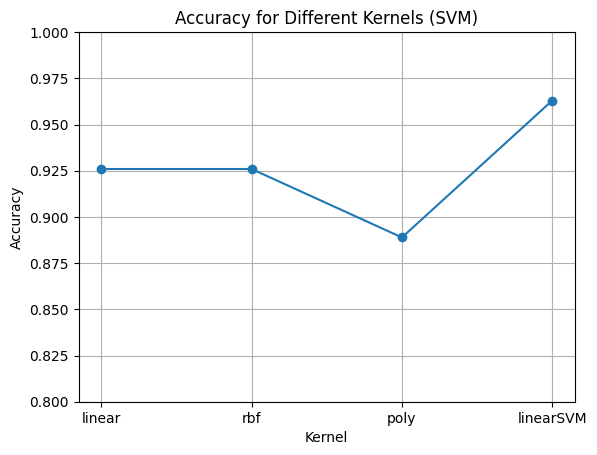

In [112]:
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

kernels = ['linear', 'rbf', 'poly', 'linearSVM']
C = 1 # SVM regularization parameter
opts = dict(C=C, tol=1e-6, max_iter=int(1e6))
accuracies = []  # 用來收集準確率

for kernel in kernels:
    if kernel == 'linearSVM':
        clf_svm = LinearSVC(**opts)
    else:
        clf_svm = SVC(kernel=kernel, **opts)
    
    clf_svm.fit(Z_train, y_train)
    y_pred = clf_svm.predict(Z_test)
    
    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率
    
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

# 繪製折線圖
plt.plot(kernels, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Kernels (SVM)')
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

#### <strong><font color=lightsteelblue>神經網路 (Neural Network)；使用主成分PCA資料</font></strong>

以下程式碼目的是對訓練集資料使用 Neural Network 訓練模型並測試準確率，其中使用三種不同的 solver (演算法)，並以準確率畫出折線圖方便觀察。

三種 solver 的測試結果準確率如下：
- 'sgd'  ->   acuracy = 0.963

- 'lbfgs'  ->   acuracy = 0.9074

- 'adam'       ->   acuracy = 0.9259

表現最好的為使用演算法 'sgd' 的 96.3%。

Solver: sgd
              precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.90      1.00      0.95        18
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

Accuracy: 96.30%

Solver: lbfgs
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.81      0.94      0.87        18
           3       0.93      0.87      0.90        15

    accuracy                           0.91        54
   macro avg       0.91      0.91      0.91        54
weighted avg       0.92      0.91      0.91        54

Accuracy: 90.74%

Solver: adam
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        21
           2       0.85      0.94      0.89        18


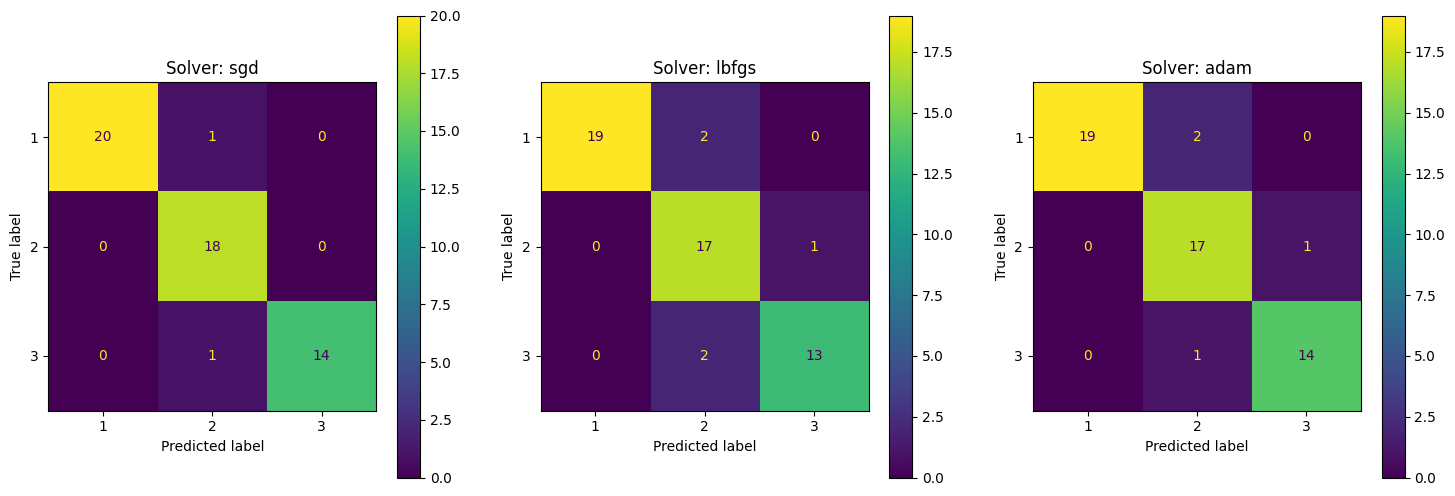

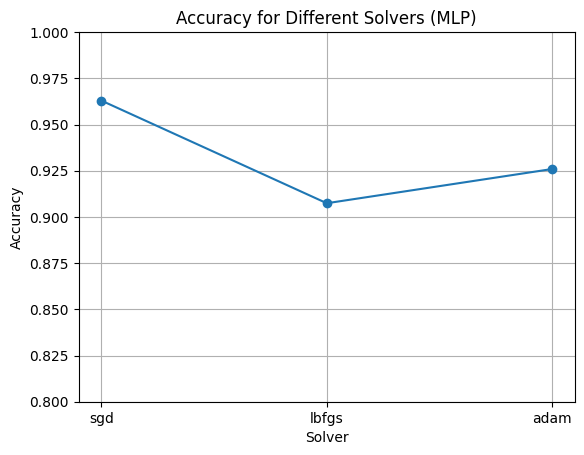

In [117]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

solvers = ['sgd', 'lbfgs', 'adam']
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes=hidden_layers, verbose=False, activation=activation, tol=1e-6, max_iter=int(1e6))

accuracies = []  # 用來收集準確率
confusion_matrices = []  # 用來收集混淆矩陣

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 創建 1x3 的子圖

for i, solver in enumerate(solvers):
    clf_MLP = MLPClassifier(solver=solver, **opts)
    clf_MLP.fit(Z_train, y_train)
    y_pred = clf_MLP.predict(Z_test)

    accuracy = accuracy_score(y_test, y_pred)  # 計算準確率
    accuracies.append(accuracy)  # 收集準確率

    print(f"Solver: {solver}")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")

    # 繪製混淆矩陣
    disp = ConfusionMatrixDisplay.from_estimator(clf_MLP, Z_test, y_test, ax=axes[i])
    disp.ax_.set_title(f'Solver: {solver}')
    confusion_matrices.append(disp.confusion_matrix)  # 收集混淆矩陣

# 繪製準確率折線圖
plt.figure()
plt.plot(solvers, accuracies, marker='o', linestyle='-')
plt.title('Accuracy for Different Solvers (MLP)')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1)
plt.grid(True)
plt.show()

<hr>

#### <strong><font color=#29AB87>標準化資料分類結果： </font></strong> 

以下將列出將標準化之原始資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 96.3%

- Support Vector Machine : 94%

- Neural Network : 94.4%

準確率最高的分類器為 Logistic Regression 的 96.3% 。

<hr>

#### <strong><font color=#29AB87>主成分資料分類結果： </font></strong> 
主成分涵蓋原始資料之資訊量：
- 96.37%

以下將列出將主成分資料在三種不同分類器中使用不同演算法或核函數準確率最高的結果：
- Logistic Regression : 96.3%

- Support Vector Machine : 96.3%

- Neural Network : 96.3%

準確率在主成分資料中，不論分類器為何，最佳結果皆為 96.3% 。

<hr>

#### <strong><font color=#D2691E>資料分類結果觀察： </font></strong> 

在此葡萄酒的資料中，觀察到原始資料的分類準確率不論分類器為何最高可以達到96.3%，且主成分資料所有分類器的結果皆為96.3%。要達到這種結果，想必是要在選取多少主成分時，確保選取足夠主成分使其包含原始資料足夠的資訊。

且在主成分資料中，三種分類器的準確率皆相同，可能原因是因為該筆資料檔案較小，再加上選取的主成分涵蓋較多的舊資訊，造成準確率相差非常小且幾乎相同的狀況。
